In [2]:
%pylab inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy 
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


## Cartpole RNN with partial observability.

Only observe the position and angle -- requires integration over time to solve the problem

## Multiple runs with delayed actions

In [3]:
def smooth(y, box_pts=50):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [12]:
#Load BP results
lmbda = 5e-3
var_xi = 0.01
method = 'backprop'
learning_rate = 1e-3
N_epochs = 10000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
#fn_in = './experiments/cartpole_rnn_partialobs_sgdnp_delayed/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']
Nruns = 5
theta_d_bp = xs[:,:,:,:,:,0].reshape(Nruns, N_epochs,-1, nB)
theta_bp = xs[:,:,:,:,:,1].reshape(Nruns, N_epochs,-1,nB)
h_d_bp = xs[:,:,:,:,:,2].reshape(Nruns, N_epochs,-1,nB)
h_bp = xs[:,:,:,:,:,3].reshape(Nruns, N_epochs,-1,nB)

In [5]:
theta_bp.shape

(5, 10000, 100, 20)

In [11]:
#Load FA results
lmbda = 5e-3
var_xi = 0.01
method = 'feedbackalignment'
learning_rate = 1e-3
N_epochs = 10000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
#fn_in = './experiments/cartpole_rnn_partialobs_sgdnp_delayed/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_fa = xs[:,:,:,:,:,0].reshape(Nruns, N_epochs,-1, nB)
theta_fa = xs[:,:,:,:,:,1].reshape(Nruns, N_epochs,-1,nB)
h_d_fa = xs[:,:,:,:,:,2].reshape(Nruns, N_epochs,-1,nB)
h_fa = xs[:,:,:,:,:,3].reshape(Nruns, N_epochs,-1,nB)

In [14]:
#Load NP results
lmbda = 5e-3
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
N_epochs = 10000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
#fn_in = './experiments/cartpole_rnn_partialobs_sgdnp_delayed/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_np = xs[:,:,:,:,:,0].reshape(Nruns, N_epochs,-1, nB)
theta_np = xs[:,:,:,:,:,1].reshape(Nruns, N_epochs,-1,nB)
h_d_np = xs[:,:,:,:,:,2].reshape(Nruns, N_epochs,-1,nB)
h_np = xs[:,:,:,:,:,3].reshape(Nruns, N_epochs,-1,nB)

In [9]:
threshold = np.pi/8
theta_bp.shape
bp_fallrates = 1-np.mean(theta_bp[:,:,:,:]<threshold, 2)
bp_fallrates = np.mean(bp_fallrates, 2)
bp_fallrates.shape

(5, 10000)

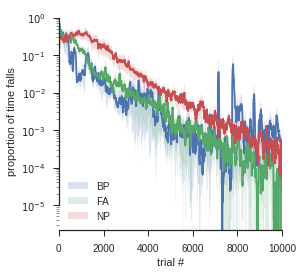

In [16]:
fig, axis = plt.subplots(1,1,figsize = (4,4))

threshold = np.pi/6

bp_fallrates = 1-np.mean(theta_bp[:,:,:,:]<threshold, 2)
bp_fallrates = np.mean(bp_fallrates,2)
bp_fallrates = smooth(bp_fallrates)

fa_fallrates = 1-np.mean(theta_fa[:,:,:,:]<threshold, 2)
fa_fallrates = np.mean(fa_fallrates,2)
fa_fallrates = smooth(fa_fallrates)

np_fallrates = 1-np.mean(theta_np[:,:,:,:]<threshold, 2)
np_fallrates = np.mean(np_fallrates,2)
np_fallrates = smooth(np_fallrates)

sns.tsplot(bp_fallrates, ax = axis, color = 'C0', ci = 68)
sns.tsplot(fa_fallrates, ax = axis, color = 'C1', ci = 68)
sns.tsplot(np_fallrates, ax = axis, color = 'C2', ci = 68)

axis.set_xlabel('trial #')
axis.set_yscale('log')
axis.legend(['BP', 'FA', 'NP'])
axis.set_xlim([0, 10000])
axis.set_ylabel('proportion of time falls')
sns.despine(trim=True)
#plt.savefig('./figures/cartpole_partialobs_results_delayed.pdf')